In [1]:
%matplotlib nbagg

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors, cm
plt.ion()

# importing system packages
import os
import sys
import glob
import h5py
import time
import itertools
import tables as tb

# importing the workhorse
import numpy as np
import pandas as pd
import seaborn as sns

# tiff packages
from PIL import Image
import tifffile

# for the fitting procedures
from lmfit import *

In [3]:
runID = 8
scanID = 1
sliceNum = 27

In [4]:
# Input file path
#slrFolder = '/xfel/ffs/dat/ue_191117_FXS/raw_data/h5/type=measurement/'
slrFolder = '/xfel/ffs/dat/ue_191123_FXS/raw_data/h5/type=measurement/'
slrFolder += 'run='+str(runID).zfill(3)+'/scan='+str(scanID).zfill(3)

#imgFolder = '/xfel/ffs/dat/ue_191117_FXS/raw_data/h5/type=raw/'
imgFolder = '/xfel/ffs/dat/ue_191123_FXS/raw_data/h5/type=raw/'
imgFolder += 'run='+str(runID).zfill(3)+'/scan='+str(scanID).zfill(3)

fnm = 'p'+str(sliceNum).zfill(4)+'.h5'
slrpath = os.path.join(slrFolder, fnm)
df = pd.read_hdf(slrpath)

imgpath = os.path.join(imgFolder, fnm)
h5 = tb.open_file(imgpath)

<IPython.core.display.Javascript object>


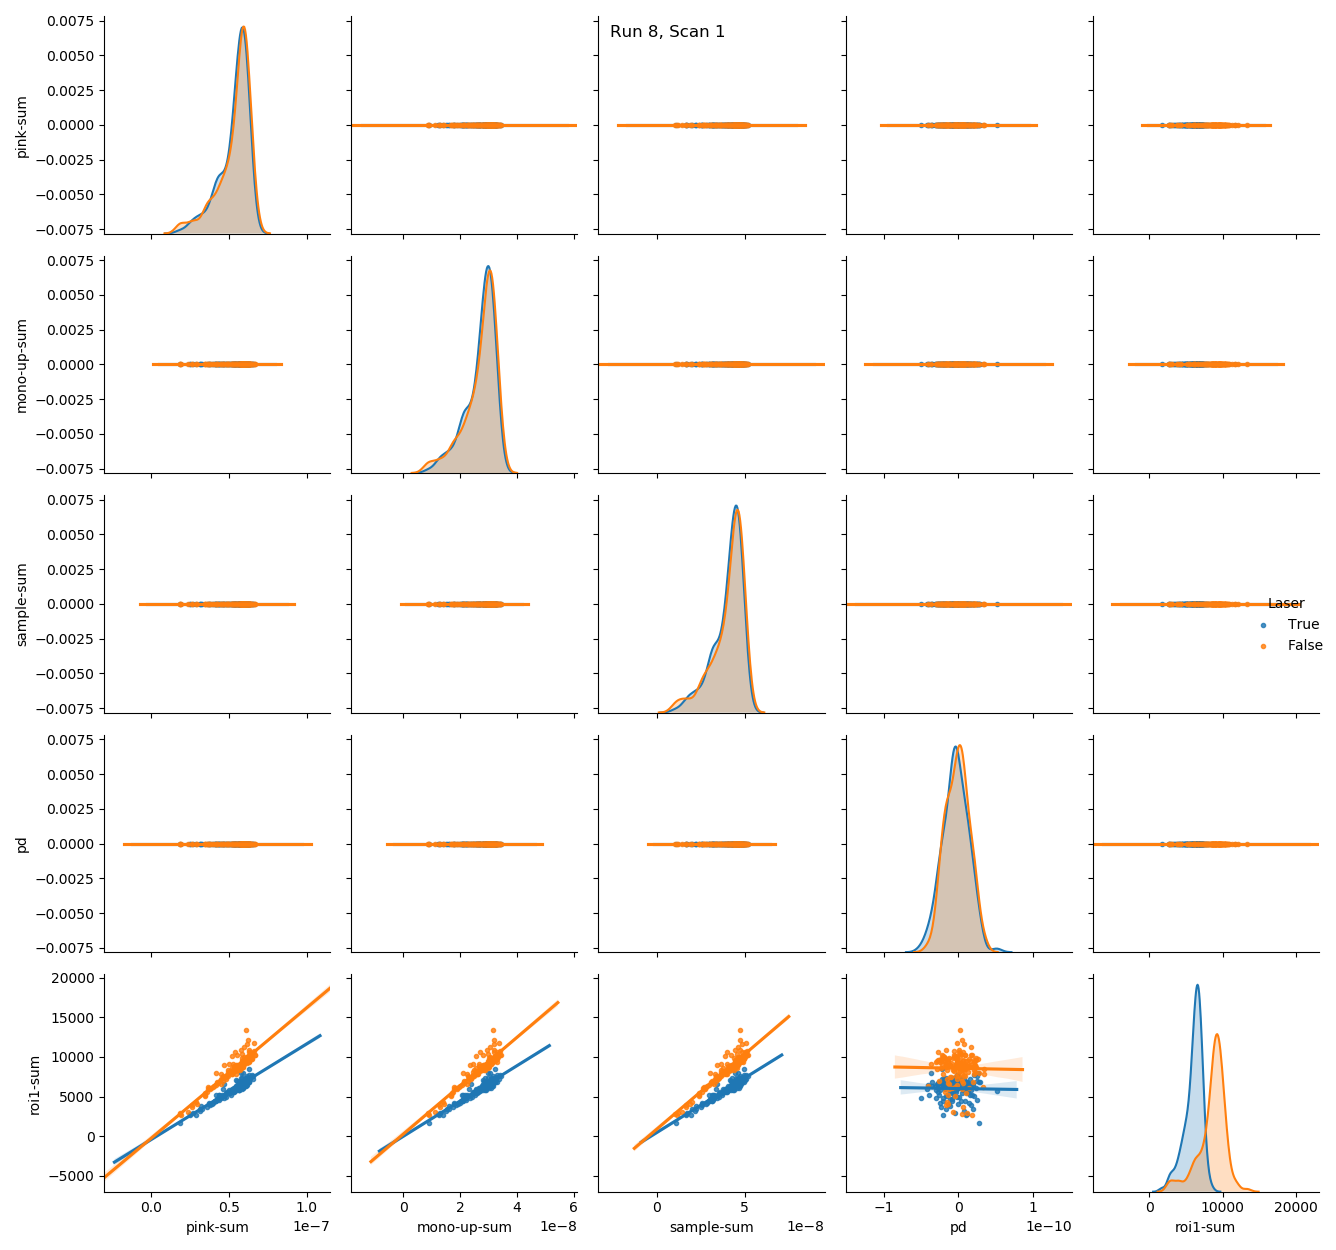

In [5]:
statsdf = df[['qbpm:oh:qbpm1:sum',
                   'qbpm:oh:qbpm2:sum',
                   'qbpm:eh1:qbpm1:sum',
                   'pd:es:pd1:ch2',
                   'detector:eh1:mpccd1:ROI1_stat.sum',
              'event_info.FIFTEEN_HERTZ']]

statsdf = statsdf.rename(columns={'qbpm:oh:qbpm1:sum': 'pink-sum', 'qbpm:oh:qbpm2:sum': 'mono-up-sum',
                       'qbpm:eh1:qbpm1:sum': 'sample-sum', 'pd:es:pd1:ch2': 'pd',
                                  'detector:eh1:mpccd1:ROI1_stat.sum': 'roi1-sum',
                       'event_info.FIFTEEN_HERTZ': 'Laser'})

statsdf = statsdf.astype({'Laser': str})

sns.pairplot(statsdf[:-1], hue='Laser', diag_kind="kde", kind='reg', markers='.')

plt.suptitle('Run {}, Scan 1'.format(runID))

plt.tight_layout()

<IPython.core.display.Javascript object>


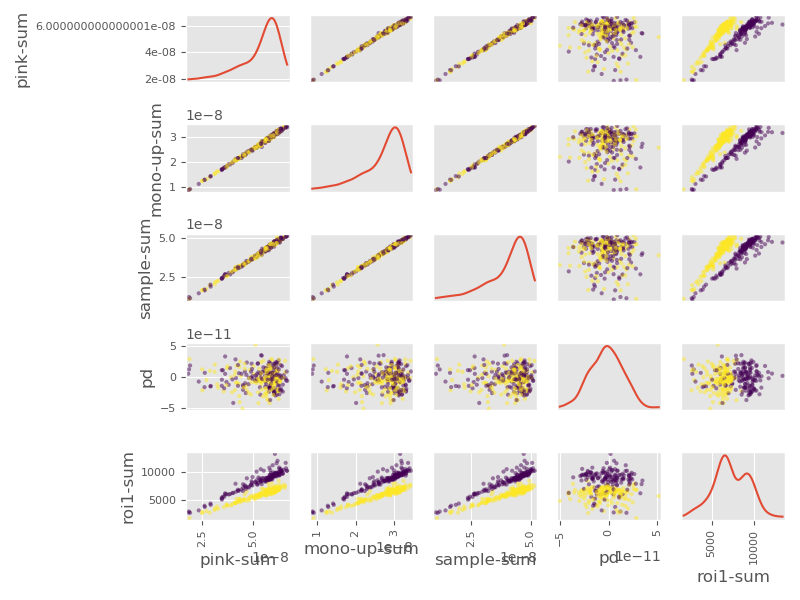

In [6]:
plt.style.use('ggplot')
statsdf = df[['qbpm:oh:qbpm1:sum',
                   'qbpm:oh:qbpm2:sum',
                   'qbpm:eh1:qbpm1:sum',
                   'pd:es:pd1:ch2',
                   'detector:eh1:mpccd1:ROI1_stat.sum']]

statsdf = statsdf.rename(columns={'qbpm:oh:qbpm1:sum': 'pink-sum', 'qbpm:oh:qbpm2:sum': 'mono-up-sum',
                       'qbpm:eh1:qbpm1:sum': 'sample-sum', 'pd:es:pd1:ch2': 'pd',
                                  'detector:eh1:mpccd1:ROI1_stat.sum': 'roi1-sum'})

axes = pd.plotting.scatter_matrix(statsdf,  c=df['event_info.FIFTEEN_HERTZ'], diagonal="kde", figsize=[8,6])
plt.tight_layout()